In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
from plotly import tools
import re
from plotly.offline import init_notebook_mode, plot, iplot
from wordcloud import WordCloud, STOPWORDS 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('zomato.csv')

In [3]:
df.shape

(51717, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
df.describe()

votes
count  51717.000000
mean     283.697527
std      803.838853
min        0.000000
25%        7.000000
50%       41.000000
75%      198.000000
max    16832.000000

In [7]:
df.dropna(axis=0, subset=['location'],inplace=True)

In [8]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7754
votes                              0
phone                           1187
location                           0
rest_type                        206
dish_liked                     28057
cuisines                          24
approx_cost(for two people)      325
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
len(df['location'].unique())

93

In [10]:
locations = pd.DataFrame({"Name":df['location'].unique()})

In [11]:
locations.head()

Name
0        Banashankari
1        Basavanagudi
2         Mysore Road
3           Jayanagar
4  Kumaraswamy Layout

In [12]:
geolocator = Nominatim(user_agent="app")

In [13]:
lat = []
lon = []

for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [14]:
locations['lat'] = lat
locations['long'] = lon
locations.head()

Name        lat       long
0        Banashankari  15.887678  75.704678
1        Basavanagudi  12.941726  77.575502
2         Mysore Road  12.946703  77.530070
3           Jayanagar  27.349301  95.315941
4  Kumaraswamy Layout  12.908149  77.555318

In [15]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())

In [16]:
Rest_locations.columns=['Name','count']
Rest_locations.head()

Name  count
0                    BTM   5124
1                    HSR   2523
2  Koramangala 5th Block   2504
3               JP Nagar   2235
4             Whitefield   2144

In [17]:
print(locations.shape)
print(Rest_locations.shape)

(93, 3)
(93, 2)


In [18]:
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations.head()

Name  count        lat       long
0                    BTM   5124  12.911276  77.604565
1                    HSR   2523  29.152347  75.724580
2  Koramangala 5th Block   2504  12.934843  77.618977
3               JP Nagar   2235  12.265594  76.646540
4             Whitefield   2144  53.553368  -2.296902

In [19]:
Restaurant_locations['count'].max()

5124

In [20]:
#### Bengaluru Coordinates - (12.9716° N, 77.5946° E)
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [21]:
basemap=generateBaseMap()

In [22]:
basemap

In [23]:
Restaurant_locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 92
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    92 non-null     object 
 1   count   92 non-null     int64  
 2   lat     92 non-null     float64
 3   long    92 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.6+ KB


In [24]:
Restaurant_locations[['lat','long','count']]

lat       long  count
0   12.911276  77.604565   5124
1   29.152347  75.724580   2523
2   12.934843  77.618977   2504
3   12.265594  76.646540   2235
4   53.553368  -2.296902   2144
..        ...        ...    ...
88  51.413002  -1.315315      6
89  13.100698  77.596345      6
90  13.078474  77.606894      3
91  12.927441  77.515522      2
92  13.032942  77.527325      1

[92 rows x 3 columns]

In [25]:
HeatMap(Restaurant_locations[['lat','long','count']],zoom=20,radius=15).add_to(basemap)

In [26]:
basemap

In [27]:
FastMarkerCluster(data=Restaurant_locations[['lat','long','count']].values.tolist()).add_to(basemap)

basemap

In [28]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [29]:
df.dropna(axis=0,subset=['rate'],inplace=True)

In [30]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [31]:
df['rating']=df['rate'].apply(lambda x:x.split('/')[0])
df['rating'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [32]:
df.replace('NEW',0,inplace=True)
df.replace('-',0,inplace=True)

In [33]:
df['rating']=pd.to_numeric(df['rating'])
df.groupby(['location'])['rating'].mean().sort_values(ascending=False)

location
Lavelle Road             4.042886
St. Marks Road           4.017201
Koramangala 3rd Block    3.978756
Sankey Road              3.965385
Church Street            3.963091
                           ...   
Electronic City          3.041909
Bommanahalli             2.926752
Hebbal                   2.880000
North Bangalore          2.385714
West Bangalore           2.020000
Name: rating, Length: 92, dtype: float64

In [34]:
df.groupby(['location'])['rating'].mean()

location
BTM                  3.296128
Banashankari         3.373292
Banaswadi            3.362926
Bannerghatta Road    3.271677
Basavanagudi         3.478185
                       ...   
West Bangalore       2.020000
Whitefield           3.384170
Wilson Garden        3.257635
Yelahanka            3.640000
Yeshwantpur          3.502679
Name: rating, Length: 92, dtype: float64

In [35]:
avg_rating=df.groupby(['location'])['rating'].mean().values

In [36]:
loc=df.groupby(['location'])['rating'].mean().index

In [37]:
geolocator=Nominatim(user_agent="app")

In [38]:
lat=[]
lon=[]
for location in loc:
    location = geolocator.geocode(location)    
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [39]:
rating=pd.DataFrame()
rating['location']=loc
rating['lat']=lat
rating['lon']=lon
rating['avg_rating']=avg_rating

In [40]:
rating.head()

location        lat        lon  avg_rating
0                BTM  12.911276  77.604565    3.296128
1       Banashankari  15.887678  75.704678    3.373292
2          Banaswadi  13.014162  77.651854    3.362926
3  Bannerghatta Road  12.891893  77.598608    3.271677
4       Basavanagudi  12.941726  77.575502    3.478185

In [41]:
rating.isna().sum()

location      0
lat           1
lon           1
avg_rating    0
dtype: int64

In [42]:
rating=rating.dropna()

In [43]:
HeatMap(rating[['lat','lon','avg_rating']],zoom=20,radius=15).add_to(basemap)
basemap

In [44]:
df2= df[df['cuisines']=='North Indian']
df2.head()

url  \
5   https://www.zomato.com/bangalore/timepass-dinn...   
50  https://www.zomato.com/bangalore/petoo-banasha...   
72  https://www.zomato.com/bangalore/spicy-tandoor...   
87  https://www.zomato.com/bangalore/krishna-sagar...   
94  https://www.zomato.com/bangalore/nandhini-delu...   

                                              address             name  \
5   37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...  Timepass Dinner   
50  276, Ground Floor, 100 Feet Outer Ring Road, B...            Petoo   
72  Opposite ICICi Bank, Hanuman Nagar, Banashanka...    Spicy Tandoor   
87  38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...    Krishna Sagar   
94  304, Opposite Apollo Public School, 100 Feet R...  Nandhini Deluxe   

   online_order book_table   rate  votes                             phone  \
5           Yes         No  3.8/5    286  +91 9980040002\r\n+91 9980063005   
50           No         No  3.7/5     21                    +91 8026893211   
72           No         No      0      0                    +91 8050884222   
87           No         No  3.5/5     31  +91 8892752997\r\n+91 7204780429   
94           No         No  2.6/5    283      080 26890011\r\n080 26890033   

        location      rest_type  \
5   Basavanagudi  Casual Dining   
50  Banashankari    Quick Bites   
72  Banashankari    Quick Bites   
87  Banashankari    Quick Bites   
94  Banashankari  Casual Dining   

                                           dish_liked      cuisines  \
5   Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...  North Indian   
50                                                NaN  North Indian   
72                                                NaN  North Indian   
87                                                NaN  North Indian   
94  Biryani, Chicken Guntur, Thali, Buttermilk, Ma...  North Indian   

   approx_cost(for two people)  \
5                          600   
50                         450   
72                         150   
87                         200   
94                         600   

                                         reviews_list menu_item  \
5   [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...        []   
50  [('Rated 2.0', 'RATED\n  This is a neatly made...        []   
72  [('Rated 4.0', 'RATED\n  cost for chicken roll...        []   
87  [('Rated 1.0', 'RATED\n  Worst experience with...        []   
94  [('Rated 3.0', 'RATED\n  Ididnt like much.\n\n...        []   

   listed_in(type) listed_in(city)  rating  
5           Buffet    Banashankari     3.8  
50        Delivery    Banashankari     3.7  
72        Delivery    Banashankari     0.0  
87        Delivery    Banashankari     3.5  
94        Delivery    Banashankari     2.6

In [45]:
north_india=df2.groupby('location')['url'].count().reset_index()
north_india.columns=['Name','count']
north_india.head()

Name  count
0                BTM    274
1       Banashankari     35
2          Banaswadi      9
3  Bannerghatta Road     60
4       Basavanagudi     17

In [46]:
north_india=north_india.merge(locations,on="Name",how='left').dropna()

In [47]:
basemap=generateBaseMap()
HeatMap(north_india[['lat','long','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

In [48]:
def Heatmap_Zone(zone):
    df3=df[df['cuisines']==zone]
    df_zone=df3.groupby(['location'],as_index=False)['url'].agg('count')
    df_zone.columns=['Name','count']
    df_zone=df_zone.merge(locations,on="Name",how='left').dropna()
    basemap=generateBaseMap()
    HeatMap(df_zone[['lat','long','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
    return basemap

In [49]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [50]:
Heatmap_Zone('South Indian')

In [51]:
Heatmap_Zone('Italian')

In [52]:
df.shape

(43942, 18)

In [53]:
df2=df.copy()

In [54]:
# df.isnull().sum()
# df.dropna(how='any',inplace=True)
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city', 'rating'],
      dtype='object')

In [55]:
df['cost'] = df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: x.replace(',','.')) 
df['cost'] = df['cost'].astype(float)

In [56]:
df.name = df.name.apply(lambda x:x.title())
df.online_order.replace(('Yes','No'),(True, False),inplace=True)
df.book_table.replace(('Yes','No'),(True, False),inplace=True)

In [57]:
df.shape

(43942, 18)

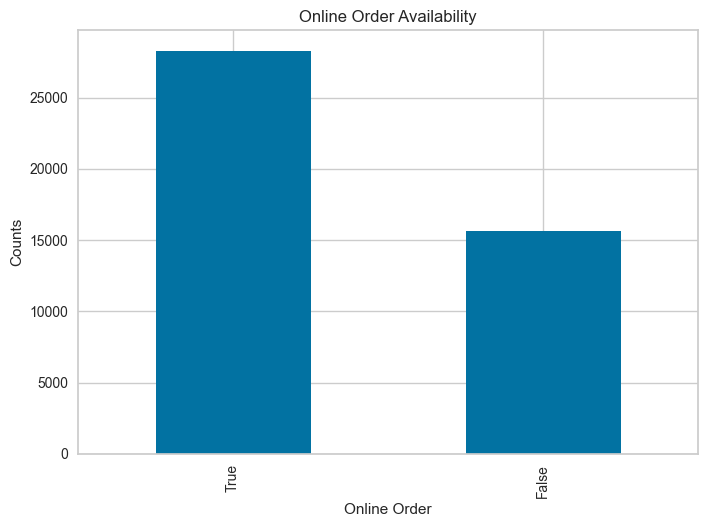

In [113]:
value_counts1 = df['online_order'].value_counts()

# Create a bar plot
value_counts1.plot(kind='bar')

# Add titles and labels
plt.title('Online Order Availability')
plt.xlabel('Online Order')
plt.ylabel('Counts')

# Display the plot
plt.show()

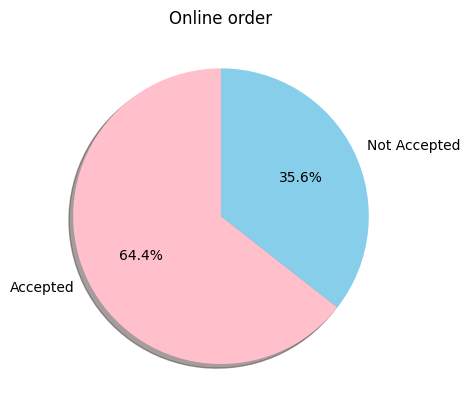

In [59]:
labels = ["Accepted",'Not Accepted']
values = df['online_order'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['pink', 'skyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.title('Online order')
plt.show()

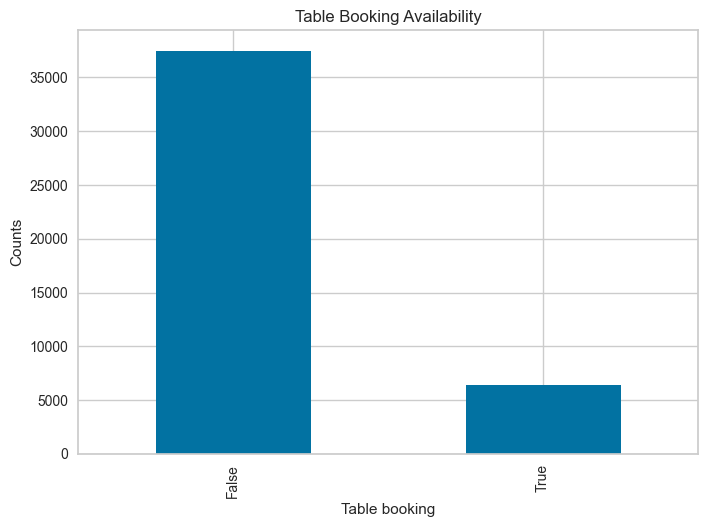

In [114]:
value_counts = df['book_table'].value_counts()

# Create a bar plot
value_counts.plot(kind='bar')

# Add titles and labels
plt.title('Table Booking Availability')
plt.xlabel('Table booking')
plt.ylabel('Counts')

# Display the plot
plt.show()

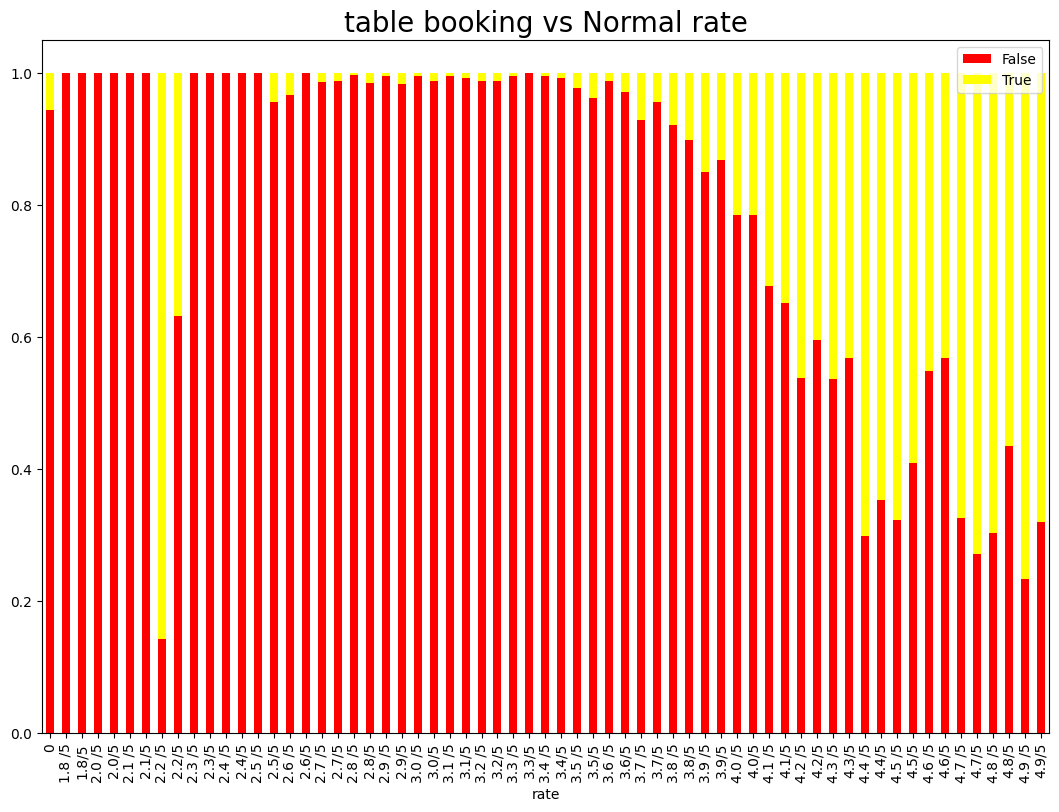

In [61]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(df['rate'], df['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('table booking vs Normal rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

Text(0.5, 1.0, 'Location wise count for restaurants')

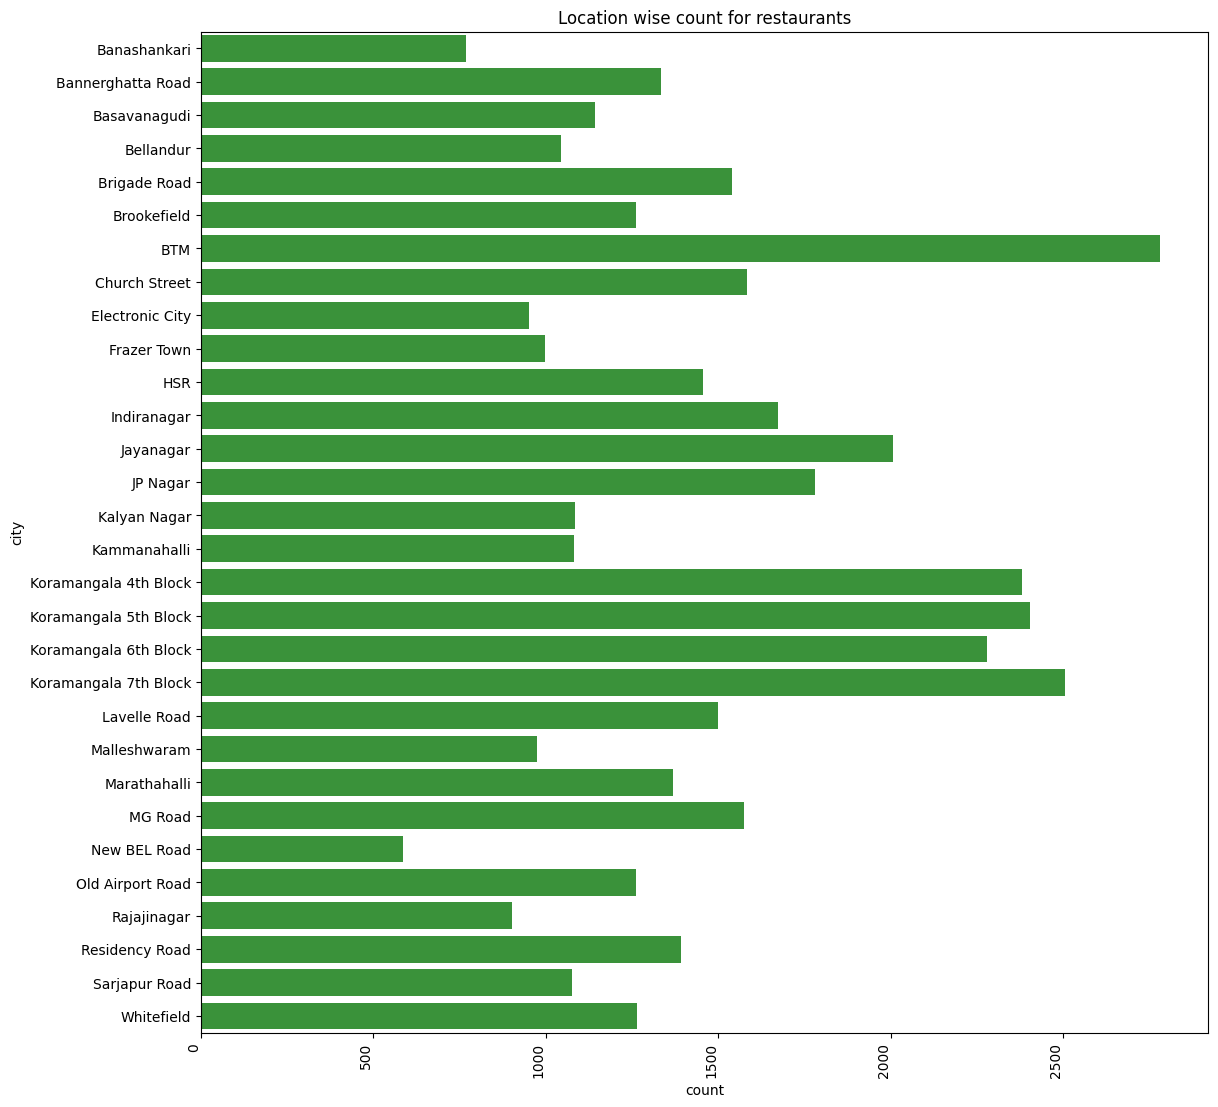

In [62]:
sns.countplot(df['city'])
sns.countplot(df['city']).set_xticklabels(sns.countplot(df['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Location wise count for restaurants')

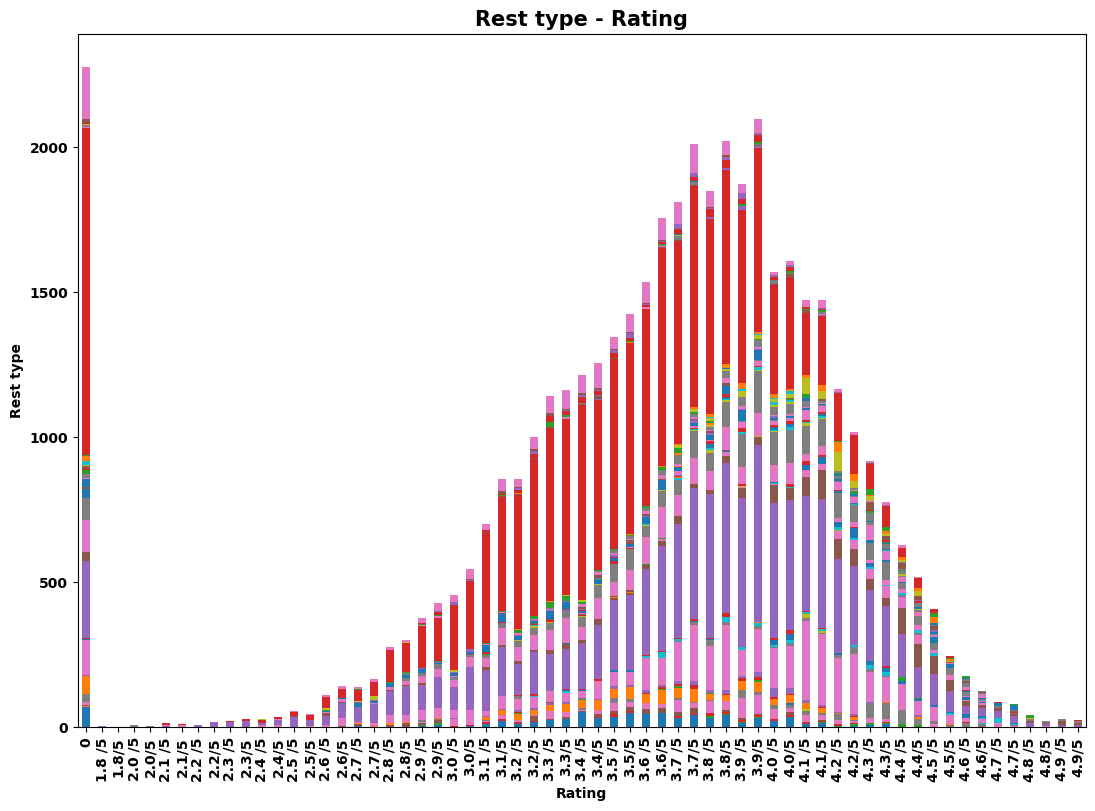

In [63]:
loc_plt=pd.crosstab(df['rate'],df['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

Text(0.5, 1.0, 'Type of Service')

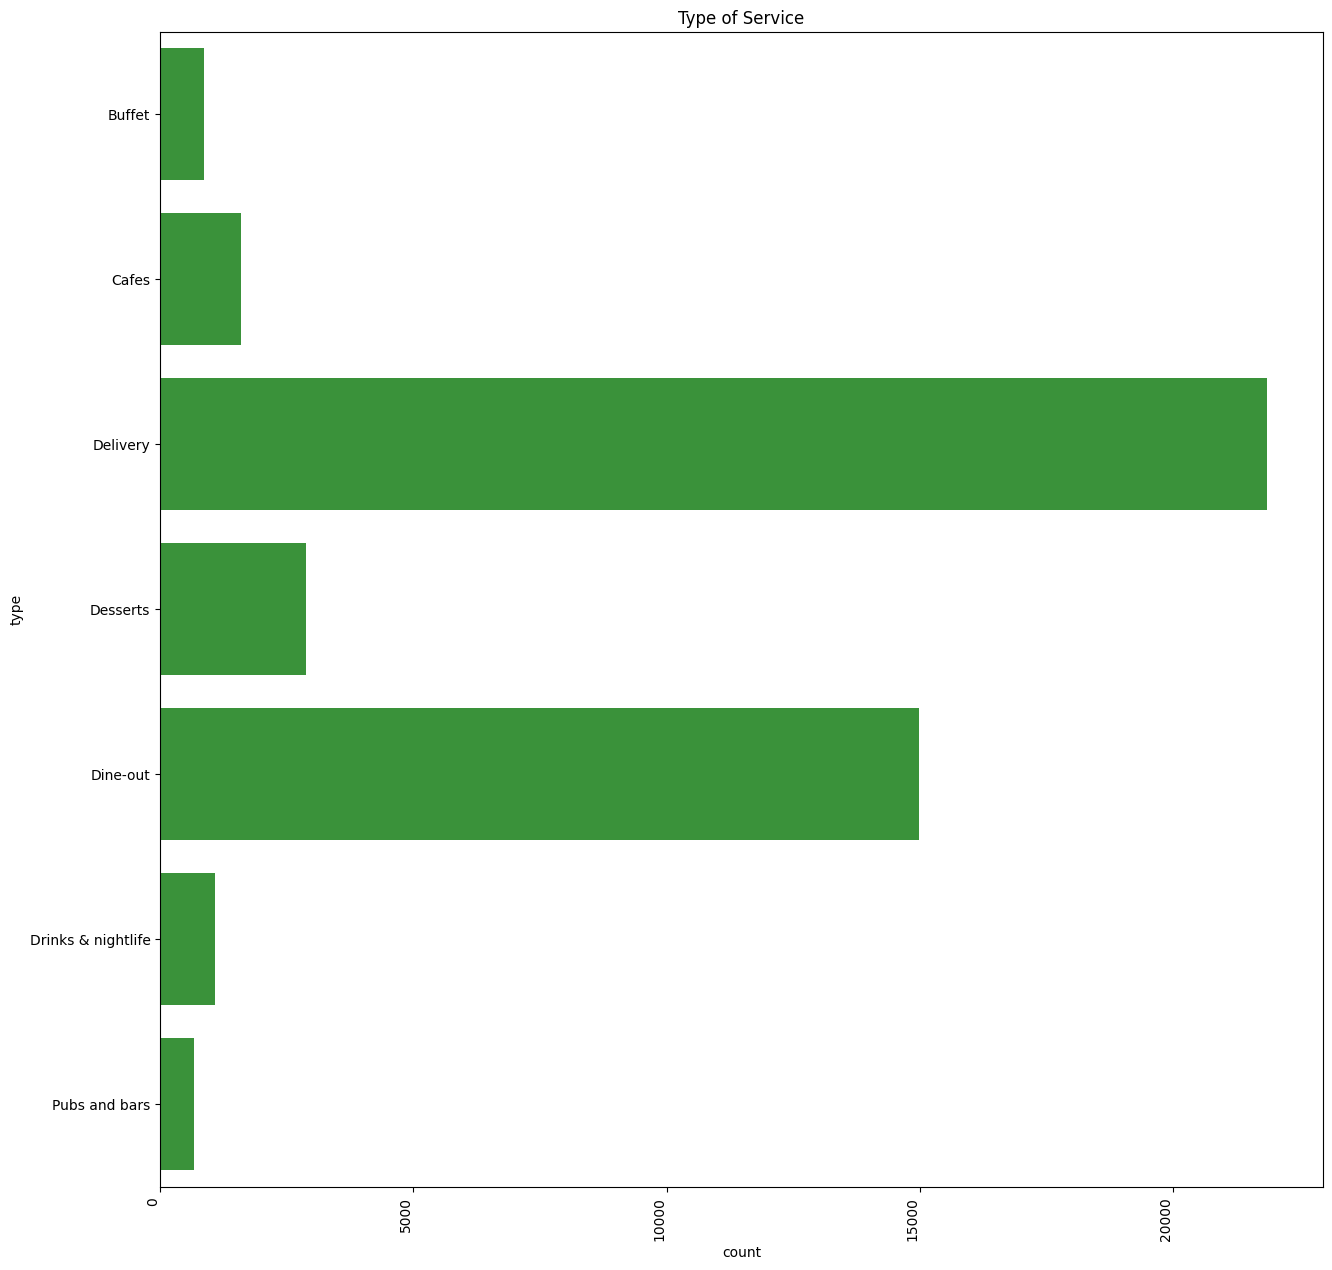

In [64]:
sns.countplot(df['type'])
sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Type of Service')

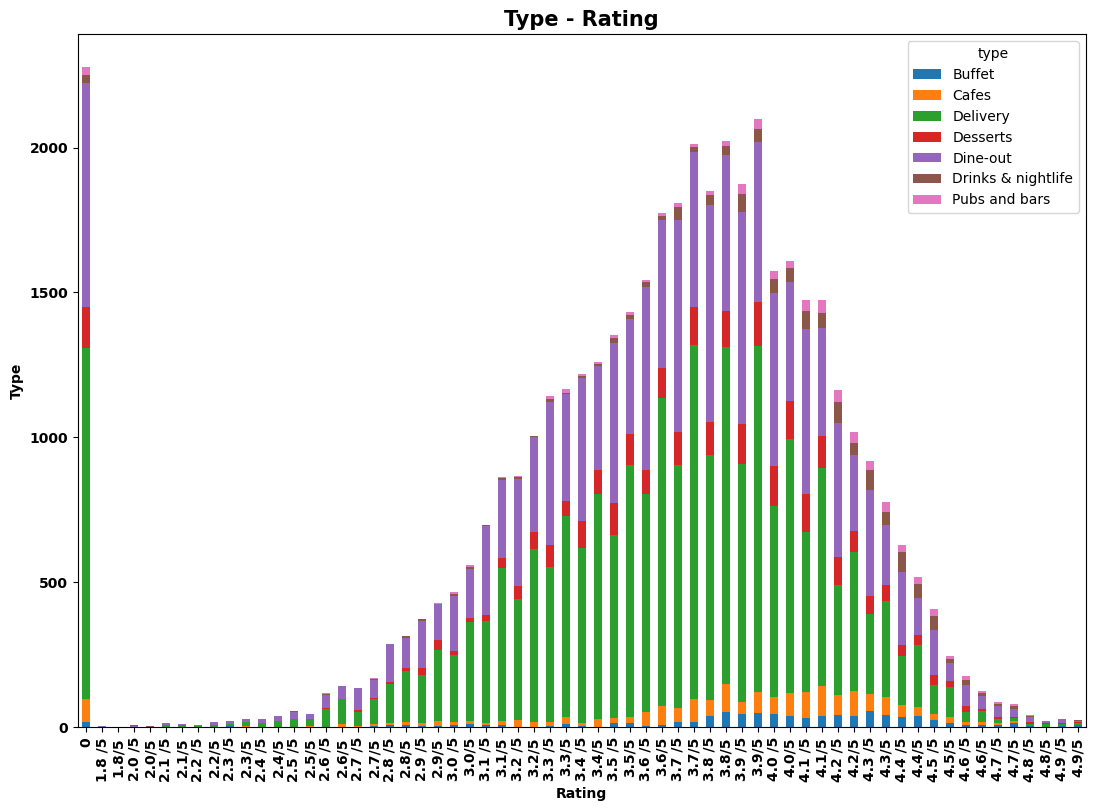

In [65]:
type_plt=pd.crosstab(df['rate'],df['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

Text(0.5, 1.0, 'NO. of restaurants in a Location')

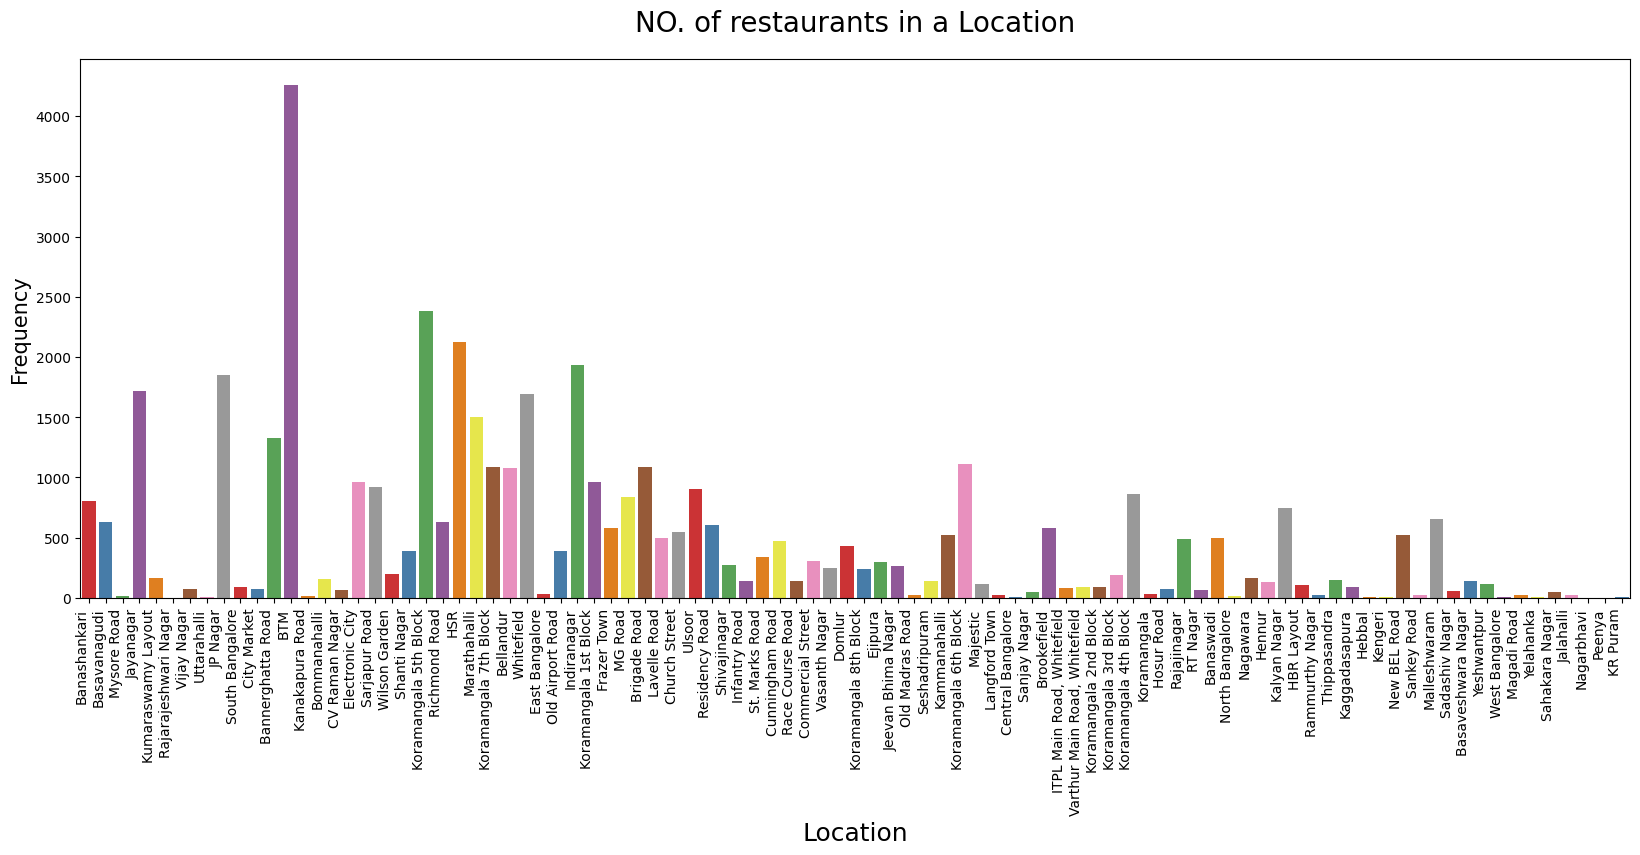

In [66]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=df, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

Text(0.5, 1.0, 'Restaurant types')

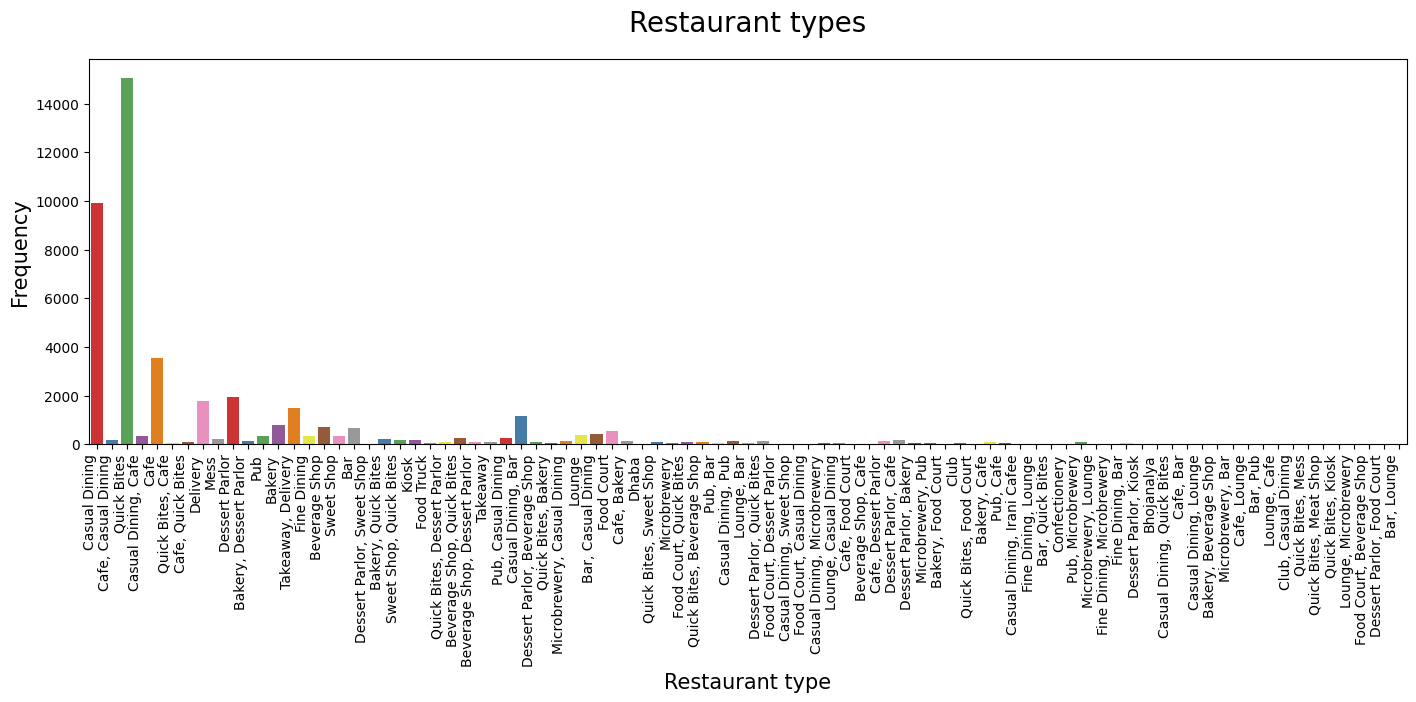

In [67]:
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=df, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)

Text(0.5, 0, 'Number of outlets')

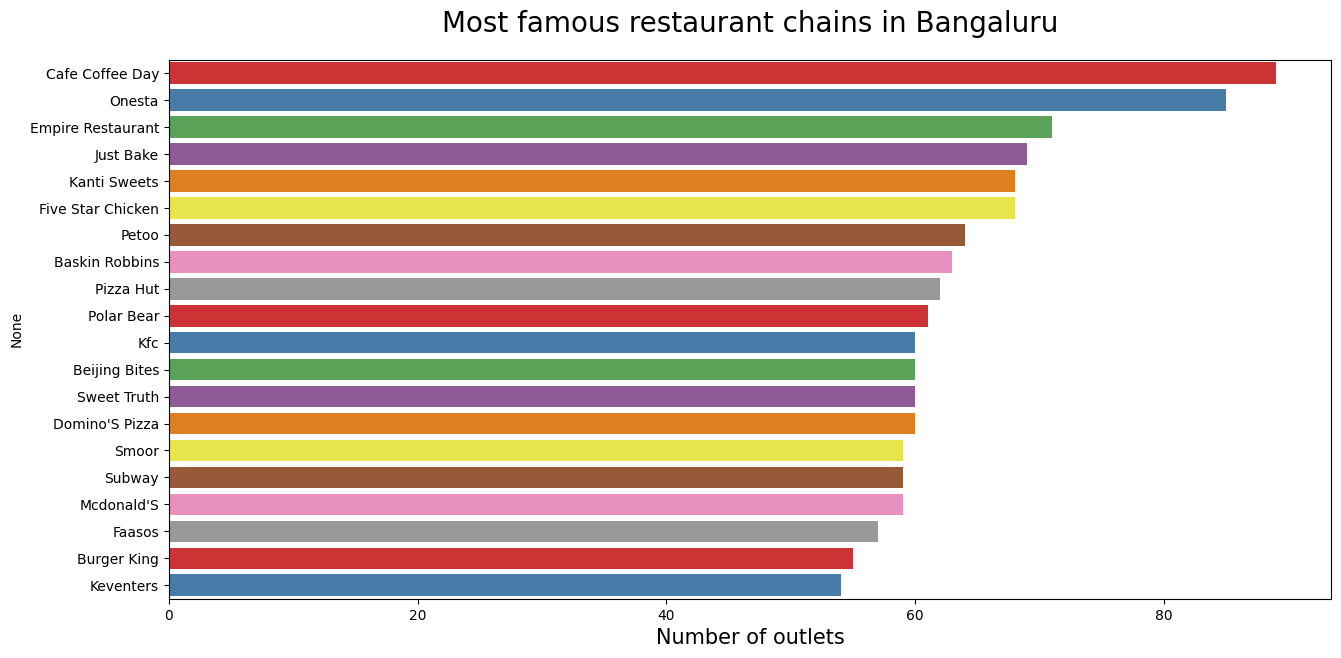

In [68]:
plt.figure(figsize=(15,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

In [69]:
def Encode(data):
    for column in data.columns[~data.columns.isin(['rate', 'cost', 'votes','rating'])]:
        data[column] = data[column].factorize()[0]
    return data

Zom_df = Encode(df.copy())
Zom_df.head()

url  address  name  online_order  book_table   rate  votes  phone  \
0    0        0     0             0           0  4.1/5    775      0   
1    1        1     1             0           1  4.1/5    787      1   
2    2        2     2             0           1  3.8/5    918      2   
3    3        3     3             1           1  3.7/5     88      3   
4    4        4     4             1           1  3.8/5    166      4   

   location  rest_type  dish_liked  cuisines   cost  reviews_list  menu_item  \
0         0          0           0         0  800.0             0          0   
1         0          0           1         1  800.0             1          0   
2         0          1           2         2  800.0             2          0   
3         0          2           3         3  300.0             3          0   
4         1          0           4         4  600.0             4          0   

   type  city  rating  
0     0     0     4.1  
1     0     0     4.1  
2     0     0     3.8  
3     0     0     3.7  
4     0     0     3.8

In [70]:
dfupd=df.copy()
dfupd['update_dish_liked']=dfupd['dish_liked'].apply(lambda x : x.split(',') if type(x)==str else [''])
rest=dfupd['rest_type'].value_counts()[:9].index

In [71]:
dfupd.dropna(axis='index',subset=['rest_type'],inplace=True)
dfupd.dropna(axis='index',subset=['dish_liked'],inplace=True)

In [72]:
def produce_wordcloud(rest):
    
    plt.figure(figsize=(20,30))
    for i,restaurant in enumerate(rest):
        plt.subplot(3,3,i+1)
        dishes=''
        data=dfupd[dfupd['rest_type']==restaurant]
        for word in data['dish_liked']:
            words=word.split()
            # Converts each token into lowercase 
            for i in range(len(words)): 
                words[i] = words[i].lower() 
            dishes=dishes+ " ".join(words)+" "
        wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,stopwords = stopwords,width=1200, height=1200).generate(dishes)
        plt.imshow(wordcloud)
        plt.title(restaurant)
        plt.axis("off")

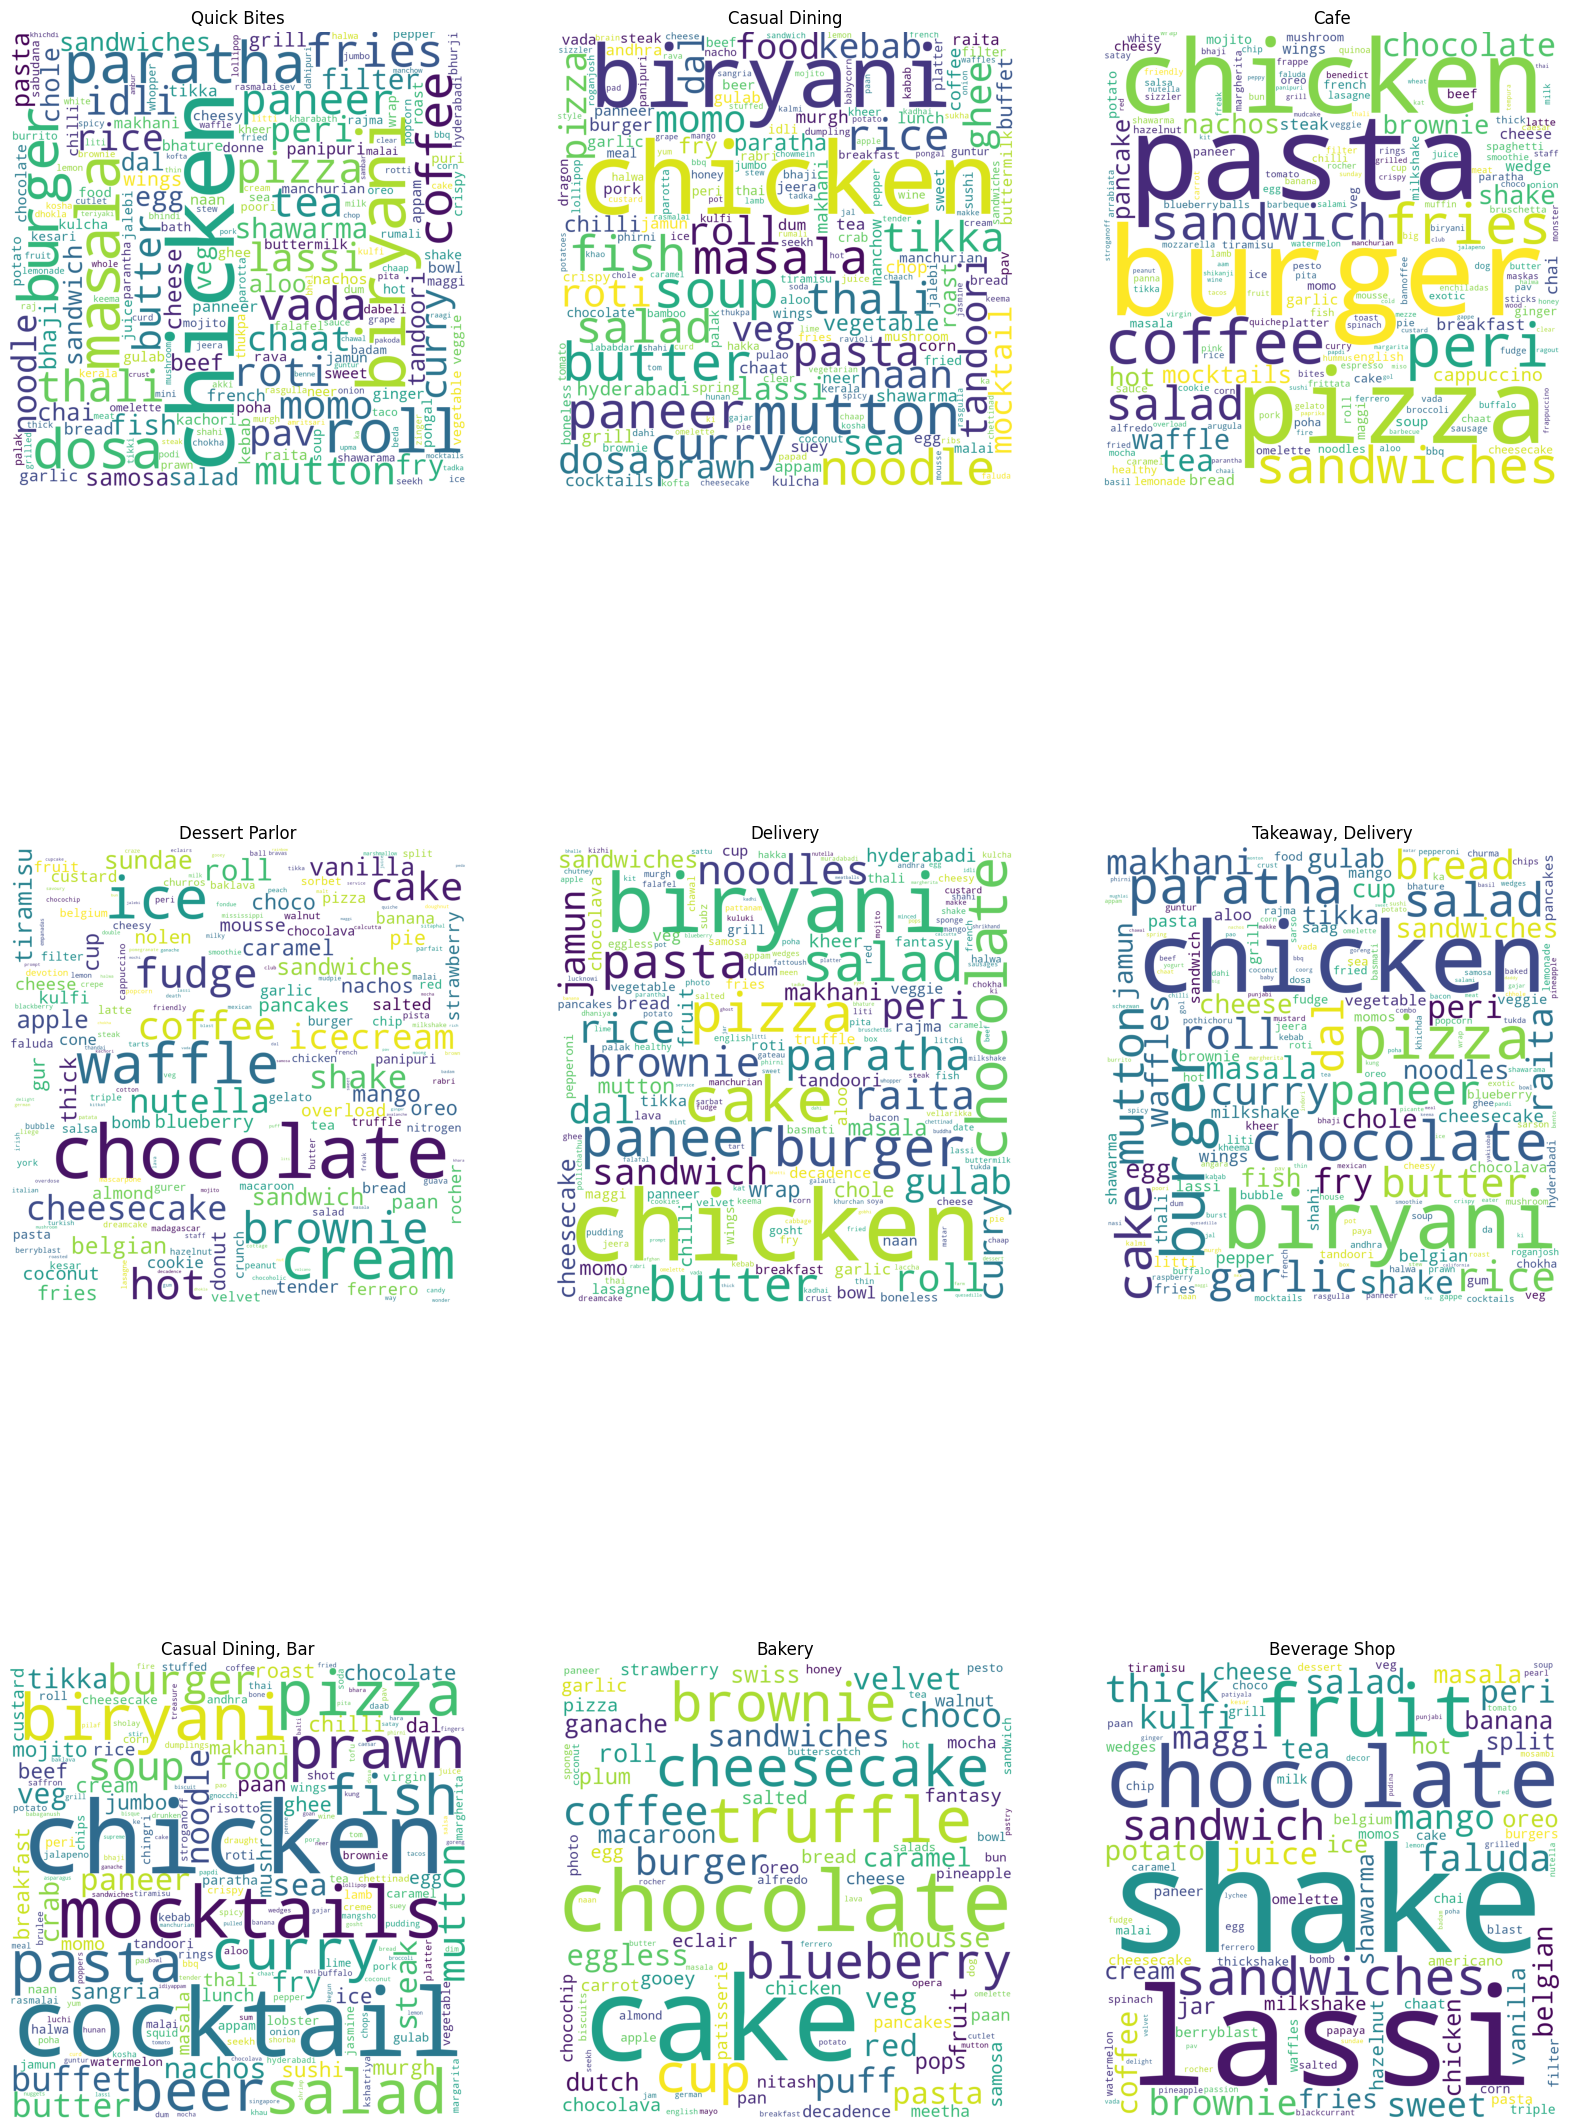

In [73]:
stopwords = set(STOPWORDS) 
produce_wordcloud(rest)

In [74]:
def reviewwords(restaurant):
    dataset=dfupd[dfupd['rest_type']==restaurant]
    total_review=' '
    for review in dataset['reviews_list']:
        review=review.lower()
        review=re.sub('[^a-zA-Z]', ' ',review)
        review=re.sub('rated', ' ',review)
        review=re.sub('x',' ',review)
        review=re.sub(' +',' ',review)
        total_review=total_review + str(review)
    wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = set(STOPWORDS), 
            min_font_size = 10).generate(total_review) 
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8)) 
    plt.imshow(wordcloud) 
    plt.axis("off")

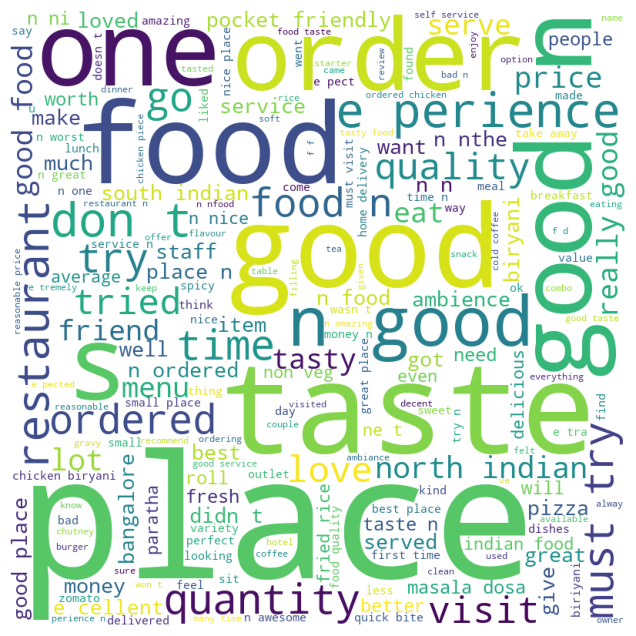

In [75]:
reviewwords('Quick Bites')

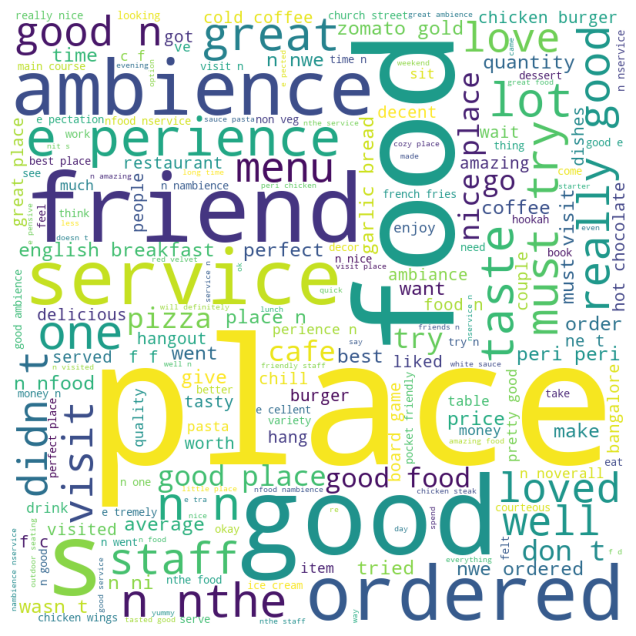

In [76]:
reviewwords('Cafe')

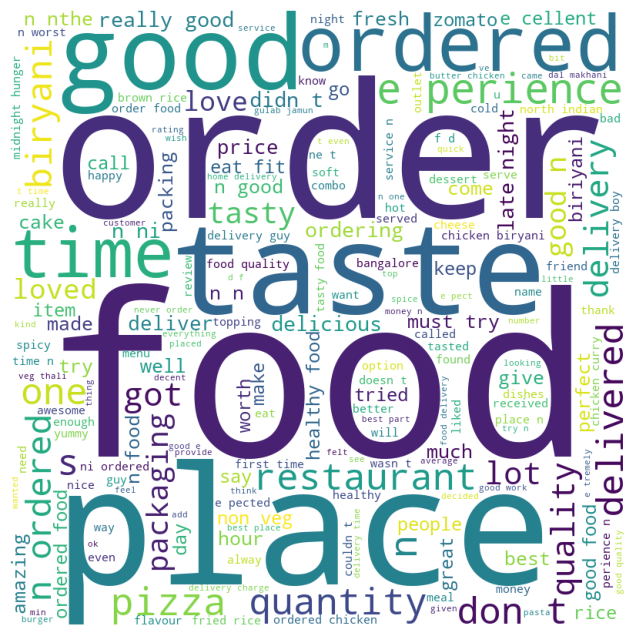

In [77]:
reviewwords('Delivery')

In [78]:
df2.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            832
location                           0
rest_type                        151
dish_liked                     20333
cuisines                          11
approx_cost(for two people)      252
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rating                             0
dtype: int64

In [79]:
!pip install pycaret

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
df2=df.copy()
df2.dropna(how='any',inplace=True)

In [81]:
df2.isna().sum()

url             0
address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
phone           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
rating          0
dtype: int64

In [82]:
train=Zom_df.iloc[:,[3,4,6,8,9,11,12,14,17]]
train.head()

online_order  book_table  votes  location  rest_type  cuisines   cost  \
0             0           0    775         0          0         0  800.0   
1             0           1    787         0          0         1  800.0   
2             0           1    918         0          1         2  800.0   
3             1           1     88         0          2         3  300.0   
4             1           1    166         1          0         4  600.0   

   menu_item  rating  
0          0     4.1  
1          0     4.1  
2          0     3.8  
3          0     3.7  
4          0     3.8

In [83]:
from pycaret.regression import *

In [84]:
exp = setup(data = train, target= 'rating')

In [85]:
models()

Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada                      AdaBoost Regressor   
gbr             Gradient Boosting Regressor   
mlp                           MLP Regressor   
xgboost           Extreme Gradient Boosting   
lightgbm    Light Gradient Boosting Machine   
catboost                 CatBoost Regressor   
dummy                       Dummy Regressor   

                                                  Reference  Turbo  
ID                                                                  
lr              sklearn.linear_model._base.LinearRegression   True  
lasso        sklearn.linear_model._coordinate_descent.Lasso   True  
ridge                     sklearn.linear_model._ridge.Ridge   True  
en        sklearn.linear_model._coordinate_descent.Elast...   True  
lar                  sklearn.linear_model._least_angle.Lars   True  
llar            sklearn.linear_model._least_angle.LassoLars   True  
omp       sklearn.linear_model._omp.OrthogonalMatchingPu...   True  
br                sklearn.linear_model._bayes.BayesianRidge   True  
ard               sklearn.linear_model._bayes.ARDRegression  False  
par       sklearn.linear_model._passive_aggressive.Passi...   True  
ransac         sklearn.linear_model._ransac.RANSACRegressor  False  
tr        sklearn.linear_model._theil_sen.TheilSenRegressor  False  
huber            sklearn.linear_model._huber.HuberRegressor   True  
kr                         sklearn.kernel_ridge.KernelRidge  False  
svm                                sklearn.svm._classes.SVR  False  
knn       sklearn.neighbors._regression.KNeighborsRegressor   True  
dt              sklearn.tree._classes.DecisionTreeRegressor   True  
rf           sklearn.ensemble._forest.RandomForestRegressor   True  
et             sklearn.ensemble._forest.ExtraTreesRegressor   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostRegr...   True  
gbr          sklearn.ensemble._gb.GradientBoostingRegressor   True  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
xgboost                        xgboost.sklearn.XGBRegressor   True  
lightgbm                     lightgbm.sklearn.LGBMRegressor   True  
catboost                    catboost.core.CatBoostRegressor   True  
dummy                          sklearn.dummy.DummyRegressor   True

In [86]:
top_3 = compare_models(n_select=3,exclude = ['xgboost', 'catboost'])

In [87]:

et = create_model('et', fold = 5,verbose=False)
rf = create_model('rf', fold = 5,verbose=False)
dt = create_model('dt', fold = 5,verbose=False)

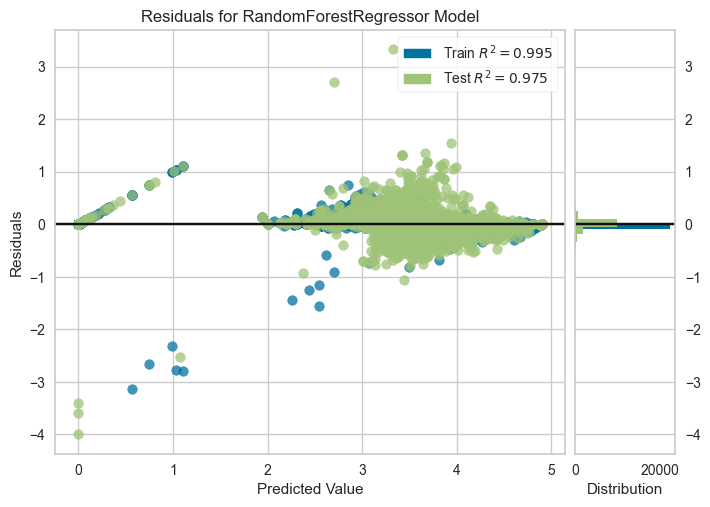

In [88]:
plot_model(rf,plot='residuals')

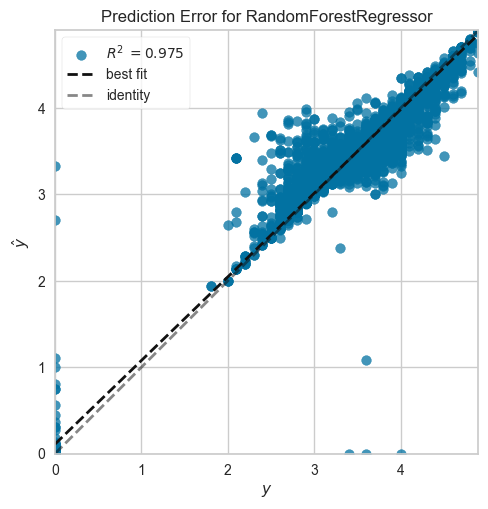

In [89]:
plot_model(rf,plot='error')

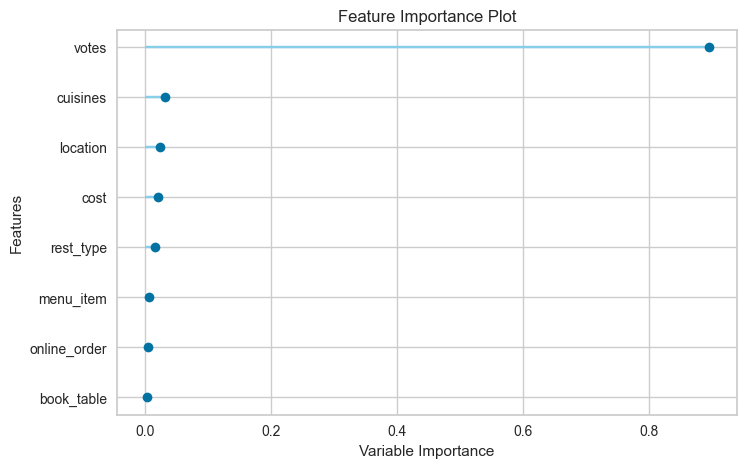

In [90]:
plot_model(rf,plot='feature')

In [91]:
plot_model(rf,plot='parameter')

Parameters
bootstrap                          True
ccp_alpha                           0.0
criterion                 squared_error
max_depth                          None
max_features                        1.0
max_leaf_nodes                     None
max_samples                        None
min_impurity_decrease               0.0
min_samples_leaf                      1
min_samples_split                     2
min_weight_fraction_leaf            0.0
n_estimators                        100
n_jobs                               -1
oob_score                         False
random_state                       1192
verbose                               0
warm_start                        False

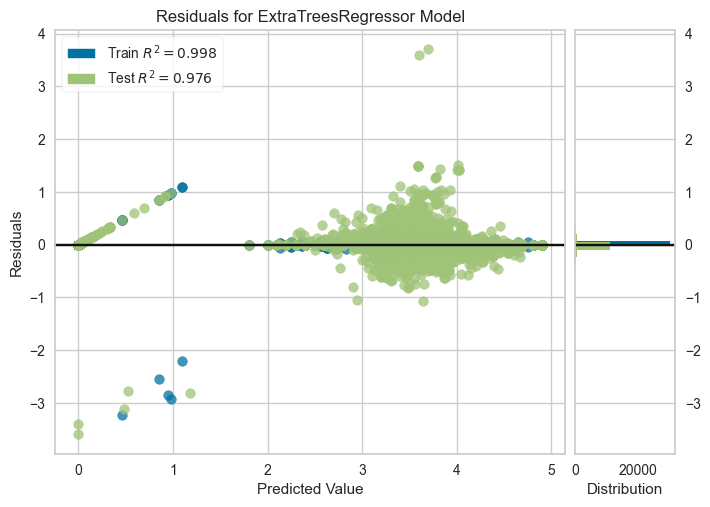

In [92]:
plot_model(et,plot='residuals')

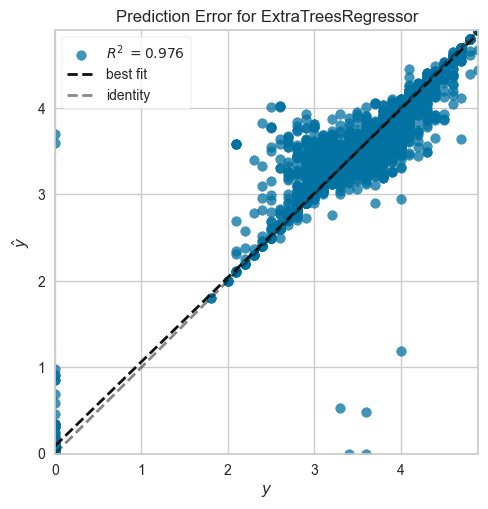

In [93]:
plot_model(et,plot='error')

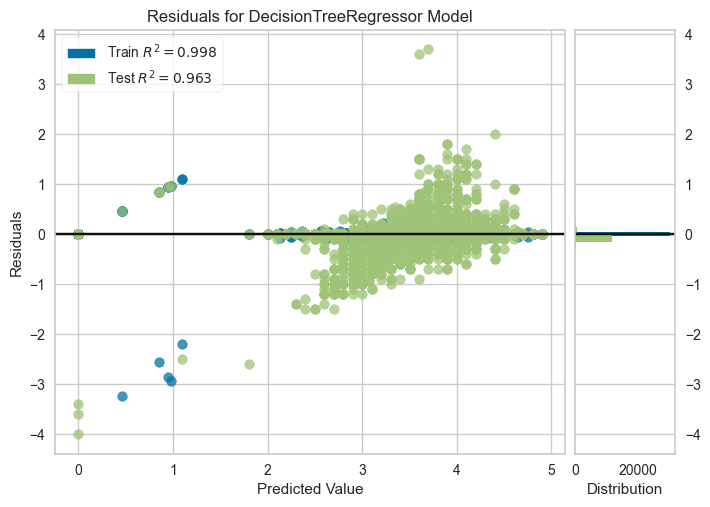

In [94]:
plot_model(dt,plot='residuals')

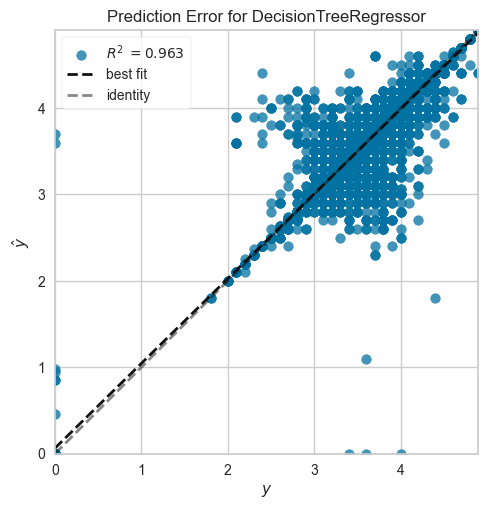

In [95]:
plot_model(dt,plot='error')